In [2]:
from fredapi import Fred
from datetime import datetime



In [3]:
fred = Fred(api_key='35ca786e9d0c63aa7ce633e16c81735f')
dxy_api = fred.get_series('DTWEXBGS')

dxy_api = dxy_api.to_frame()
dxy_api.reset_index(inplace=True)
dxy_api.columns = ['time','dxy_p']
dxy_api['time'] = dxy_api['time'].dt.strftime("%Y-%m-%d")
dxy_api['dxy_p'] = dxy_api['dxy_p'].interpolate()

In [4]:
sp500_api = fred.get_series('SP500')
sp500_api = sp500_api.to_frame()
sp500_api.reset_index(inplace=True)
sp500_api.columns = ['time','sp500_p']
sp500_api['time'] = sp500_api['time'].dt.strftime("%Y-%m-%d")
sp500_api['sp500_p'] = sp500_api['sp500_p'].interpolate()

In [5]:
vix_api = fred.get_series('VIXCLS')
vix_api = vix_api.to_frame()
vix_api.reset_index(inplace=True)
vix_api.columns = ['time','vix_p']
vix_api['time'] = vix_api['time'].dt.strftime("%Y-%m-%d")
vix_api['vix_p'] = vix_api['vix_p'].interpolate()

In [7]:
dxy_api.to_csv('data/DXY.csv', index=False)

In [8]:
sp500_api.to_csv('data/SP500.csv', index=False)

In [9]:
vix_api.to_csv('data/VIX.csv', index=False)

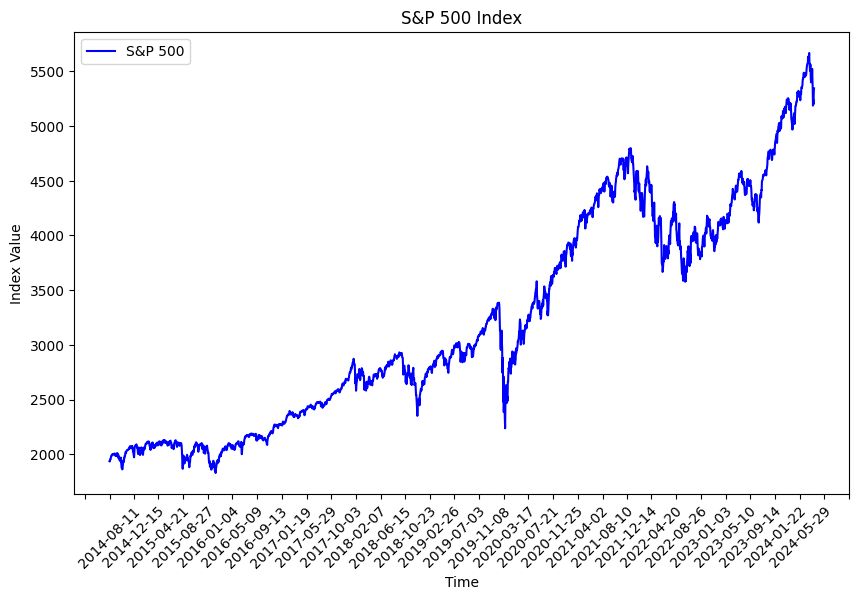

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 绘制S&P 500图像

plt.figure(figsize=(10, 6))
plt.plot(sp500_api['time'], sp500_api['sp500_p'], label='S&P 500', color='blue')
plt.title('S&P 500 Index')
plt.xlabel('Time')
plt.ylabel('Index Value')

# 设置X轴日期格式和刻度间隔
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每隔3个月显示一个日期标签

# 旋转X轴刻度标签
plt.xticks(rotation=45)

plt.legend()
plt.show()


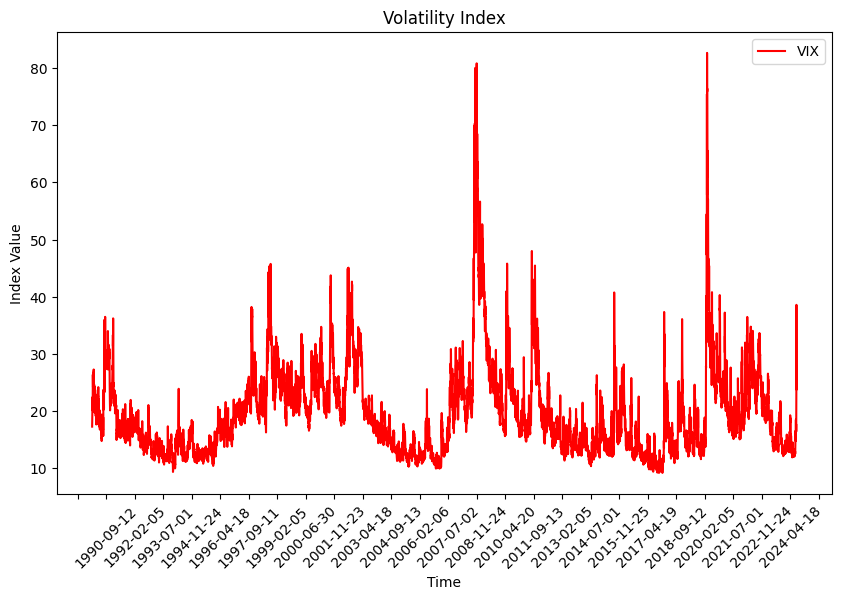

In [29]:
# 绘制VIX图像

plt.figure(figsize=(10, 6))
plt.plot(vix_api['time'], vix_api['vix_p'], label='VIX', color='red')
plt.title('Volatility Index')
plt.xlabel('Time')
plt.ylabel('Index Value')

# 设置X轴日期格式和刻度间隔
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # 每隔3个月显示一个日期标签

# 旋转X轴刻度标签
plt.xticks(rotation=45)

plt.legend()
plt.show()



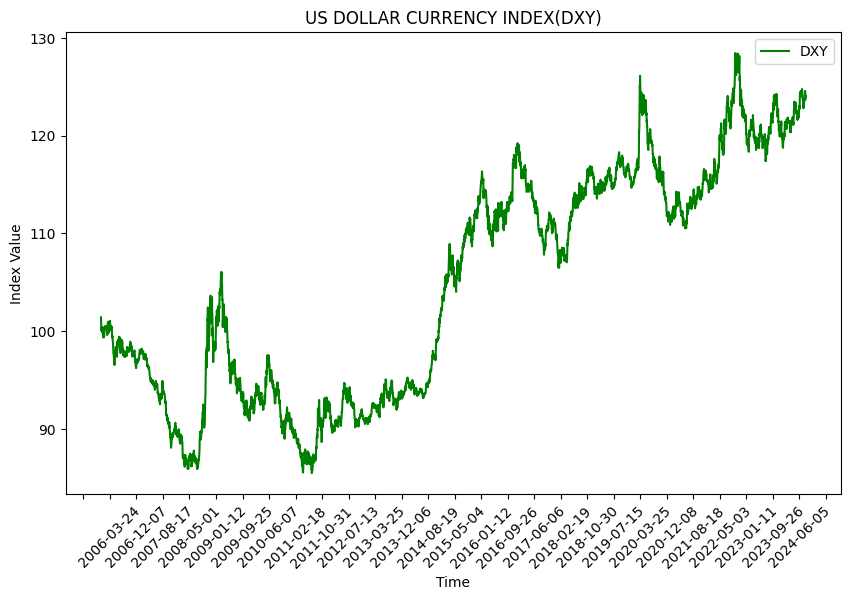

In [30]:
# 绘制DXY图像
plt.figure(figsize=(10, 6))
plt.plot(dxy_api['time'], dxy_api['dxy_p'], label='DXY', color='green')
plt.title('US DOLLAR CURRENCY INDEX(DXY)')
plt.xlabel('Time')
plt.ylabel('Index Value')

# 设置X轴日期格式和刻度间隔
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # 每隔3个月显示一个日期标签

# 旋转X轴刻度标签
plt.xticks(rotation=45)
plt.legend()
plt.show()

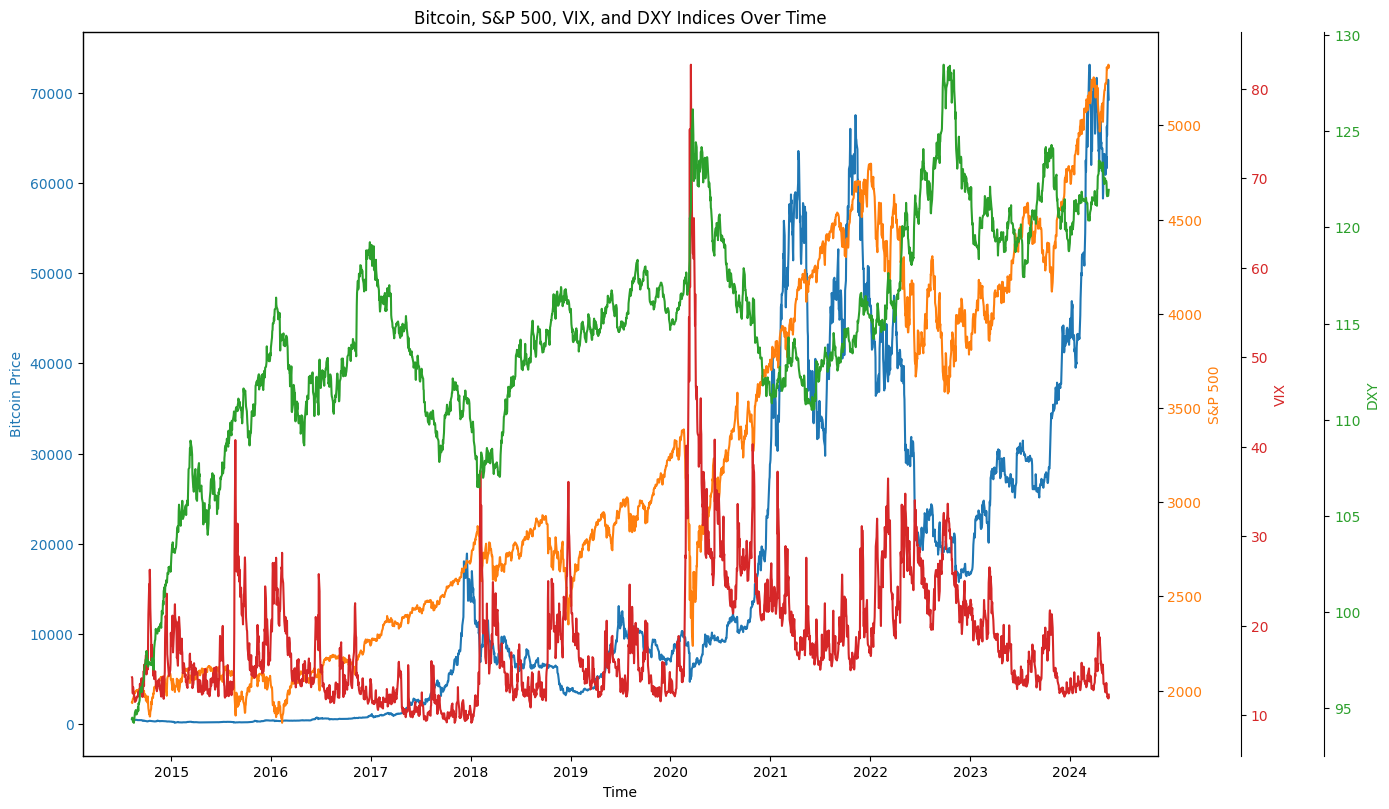

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
dxy_data = pd.read_csv('DXY.csv', parse_dates=['time'])
sp500_data = pd.read_csv('SP500.csv', parse_dates=['time'])
vix_data = pd.read_csv('VIX.csv', parse_dates=['time'])
btc_data = pd.read_csv('BTC-USD.csv', parse_dates=['time'])  # 假设比特币价格数据也有'time'列

# 合并所有数据集
merged_data = pd.merge(btc_data[['time', 'close']], sp500_data[['time', 'sp500_p']], on='time', how='inner')
merged_data = pd.merge(merged_data, vix_data[['time', 'vix_p']], on='time', how='inner')
merged_data = pd.merge(merged_data, dxy_data[['time', 'dxy_p']], on='time', how='inner')

# 创建图像
fig, ax1 = plt.subplots(figsize=(14, 8))

# 绘制比特币价格
ax1.set_xlabel('Time')
ax1.set_ylabel('Bitcoin Price', color='tab:blue')
ax1.plot(merged_data['time'], merged_data['close'], label='Bitcoin Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 添加第二个y轴 - S&P 500
ax2 = ax1.twinx()
ax2.set_ylabel('S&P 500', color='tab:orange')
ax2.plot(merged_data['time'], merged_data['sp500_p'], label='S&P 500', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 添加第三个y轴 - VIX
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # 调整第三个y轴的位置
ax3.set_ylabel('VIX', color='tab:red')
ax3.plot(merged_data['time'], merged_data['vix_p'], label='VIX', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')

# 添加第四个y轴 - DXY
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # 调整第四个y轴的位置
ax4.set_ylabel('DXY', color='tab:green')
ax4.plot(merged_data['time'], merged_data['dxy_p'], label='DXY', color='tab:green')
ax4.tick_params(axis='y', labelcolor='tab:green')

# 添加图例
fig.tight_layout()  # 调整布局以避免重叠
plt.title('Bitcoin, S&P 500, VIX, and DXY Indices Over Time')
plt.show()

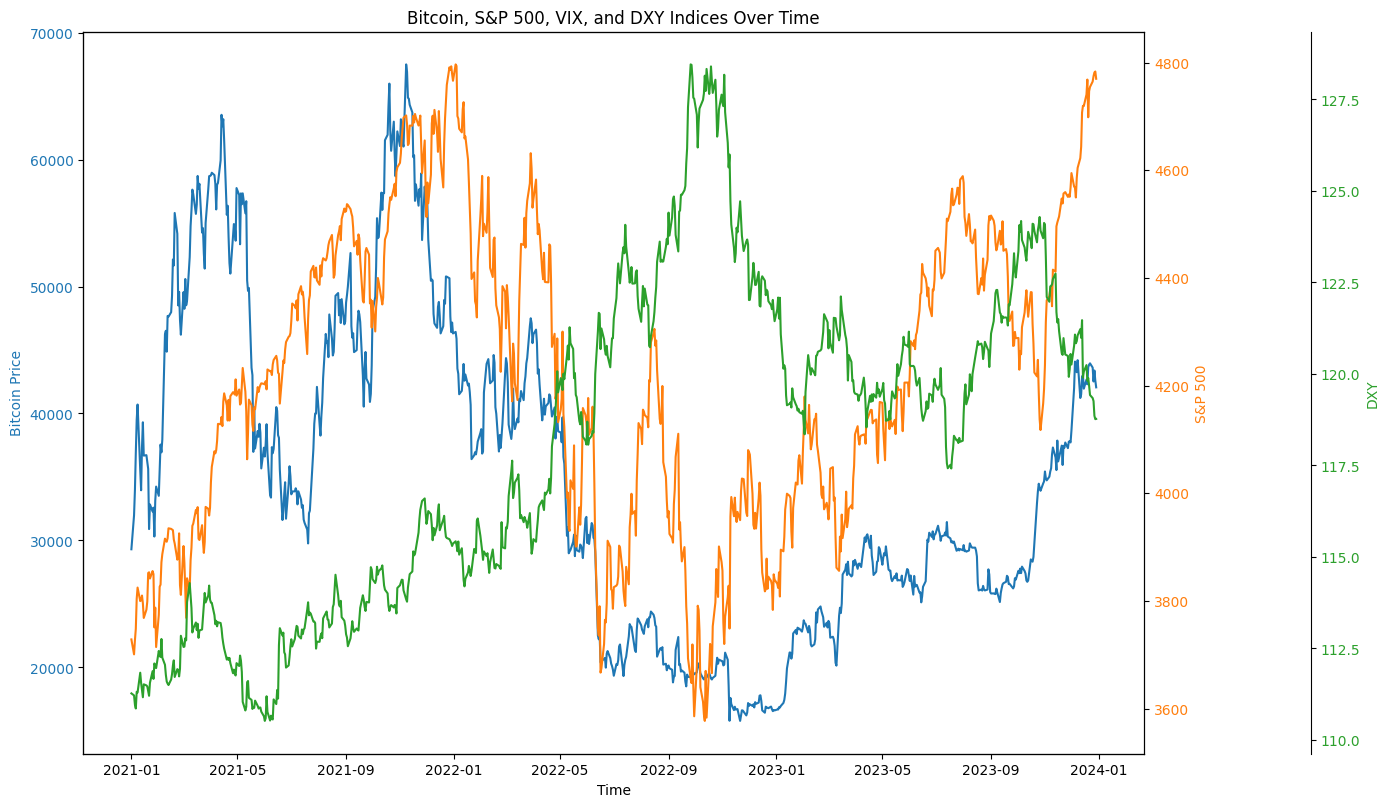

In [21]:
# 过滤出2021-2023年的数据
start_date = '2021-01-01'
end_date = '2023-12-31'
merged_data = merged_data[(merged_data['time'] >= start_date) & (merged_data['time'] <= end_date)]
# 创建图像
fig, ax1 = plt.subplots(figsize=(14, 8))

# 绘制比特币价格
ax1.set_xlabel('Time')
ax1.set_ylabel('Bitcoin Price', color='tab:blue')
ax1.plot(merged_data['time'], merged_data['close'], label='Bitcoin Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 添加第二个y轴 - S&P 500
ax2 = ax1.twinx()
ax2.set_ylabel('S&P 500', color='tab:orange')
ax2.plot(merged_data['time'], merged_data['sp500_p'], label='S&P 500', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 添加第四个y轴 - DXY
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # 调整第四个y轴的位置
ax4.set_ylabel('DXY', color='tab:green')
ax4.plot(merged_data['time'], merged_data['dxy_p'], label='DXY', color='tab:green')
ax4.tick_params(axis='y', labelcolor='tab:green')

# 添加图例
fig.tight_layout()  # 调整布局以避免重叠
plt.title('Bitcoin, S&P 500, VIX, and DXY Indices Over Time')
plt.show()